In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
file_path = '/Users/gim-yuseong/Desktop/PycharmProjects/2024_3-1AI/seeds_dataset.txt'

column_names = ["area ", "perimeter ", "compactness ", "length of kernel", "width of kernel", "asymmetry coefficient", "length of kernel groove", "class"]          

df = pd.read_csv(file_path, header=None, names=column_names, delimiter='\s+')
df.head(10)

area   perimeter   compactness   length of kernel  width of kernel  \
0  15.26       14.84        0.8710             5.763            3.312   
1  14.88       14.57        0.8811             5.554            3.333   
2  14.29       14.09        0.9050             5.291            3.337   
3  13.84       13.94        0.8955             5.324            3.379   
4  16.14       14.99        0.9034             5.658            3.562   
5  14.38       14.21        0.8951             5.386            3.312   
6  14.69       14.49        0.8799             5.563            3.259   
7  14.11       14.10        0.8911             5.420            3.302   
8  16.63       15.46        0.8747             6.053            3.465   
9  16.44       15.25        0.8880             5.884            3.505   

   asymmetry coefficient  length of kernel groove  class  
0                  2.221                    5.220      1  
1                  1.018                    4.956      1  
2                  2.699                    4.825      1  
3                  2.259                    4.805      1  
4                  1.355                    5.175      1  
5                  2.462                    4.956      1  
6                  3.586                    5.219      1  
7                  2.700                    5.000      1  
8                  2.040                    5.877      1  
9                  1.969                    5.533      1

In [4]:
# 결측치 확인
df.isnull().sum()

area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
class                      0
dtype: int64

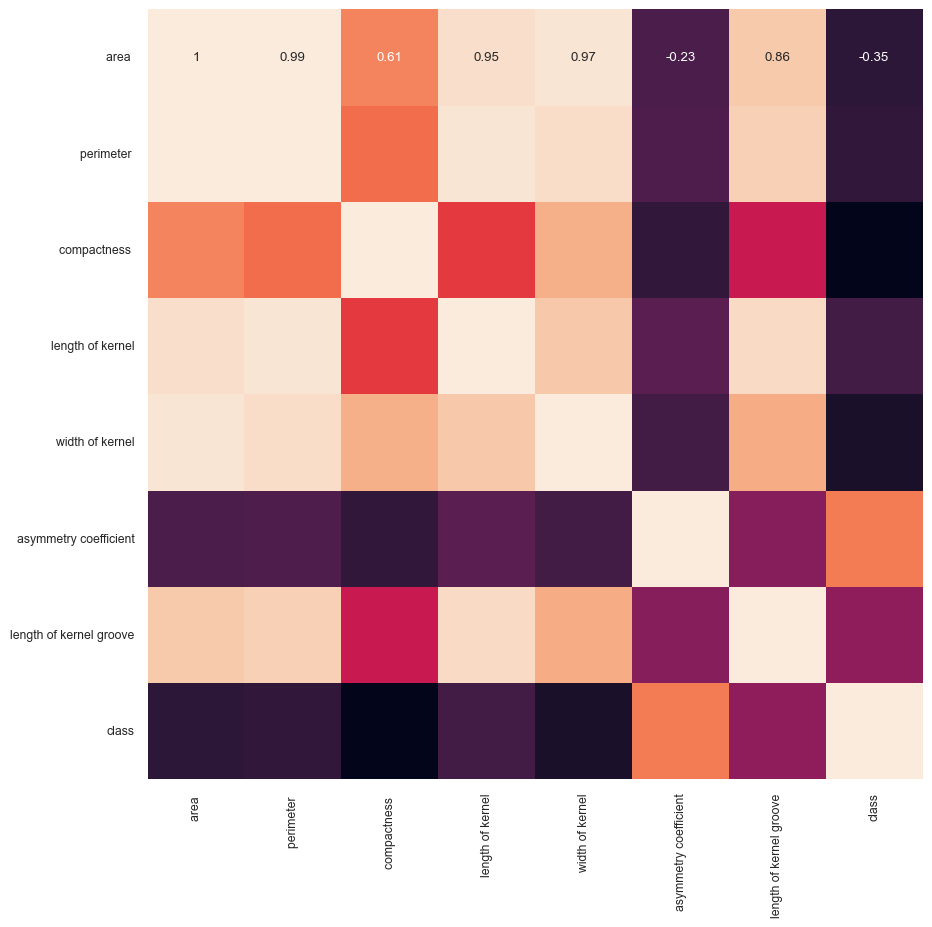

In [5]:
import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

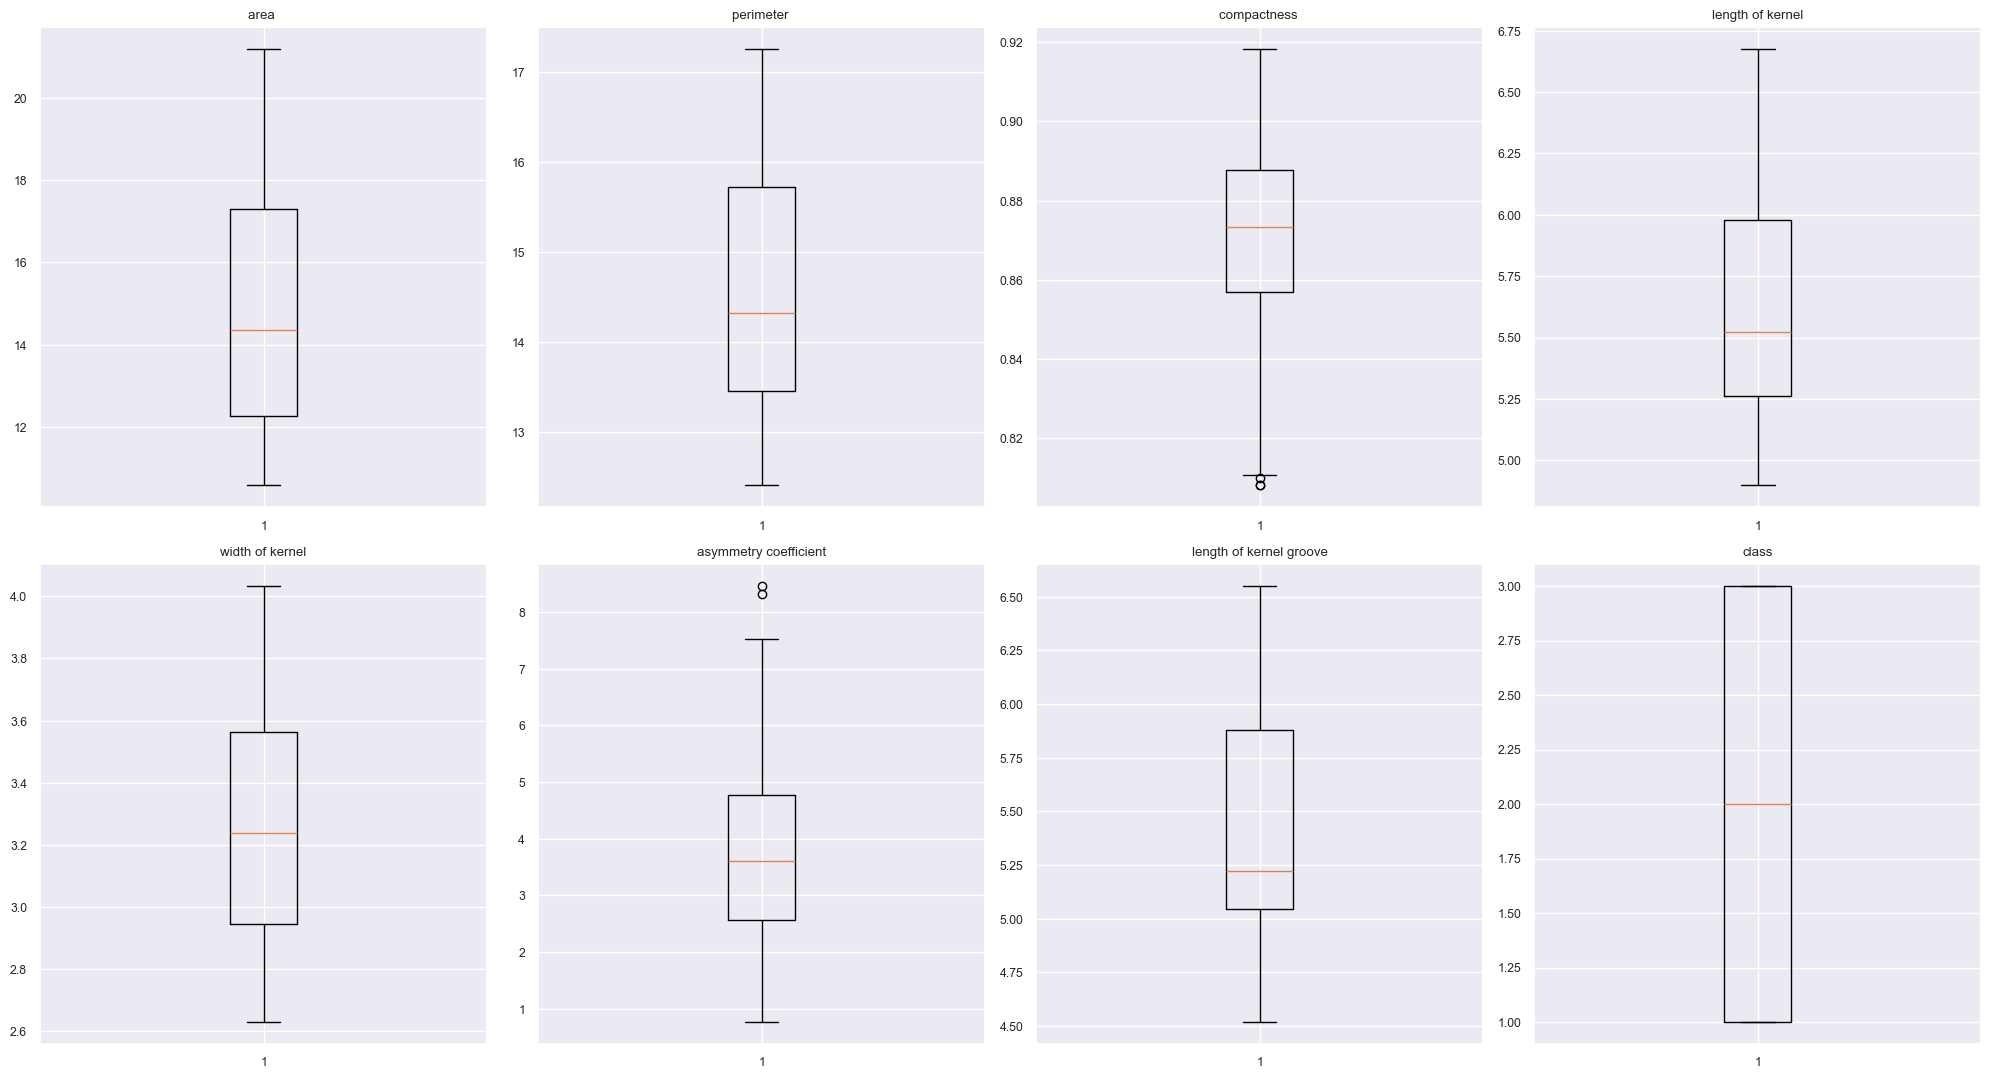

In [6]:
# 박스 플롯 그리기
plt.figure(figsize=(20, 16))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i+1)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Label')

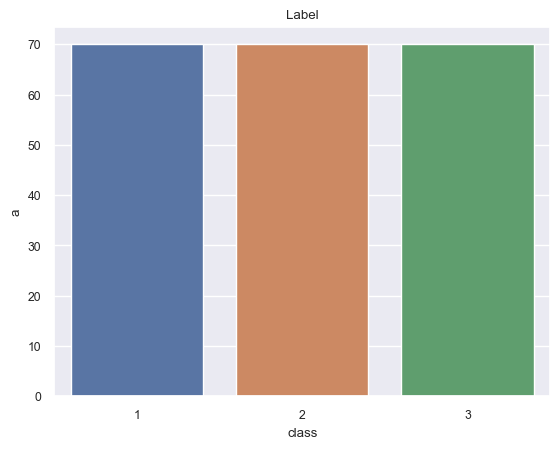

In [7]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="class")
plt.ylabel("a")
plt.title("Label")

In [8]:
# 레이블 갯수 확인 (숫자)
df['class'].value_counts()

class
1    70
2    70
3    70
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler

# 표준화(Standardization)
scaler = StandardScaler()
scaled_data_standard = scaler.fit_transform(df.drop('class', axis=1))  # rings 열 제외하고 표준화
scaled_df_standard = pd.DataFrame(scaled_data_standard, columns=df.columns[:-1])  # 데이터프레임으로 변환
scaled_df_standard

area   perimeter   compactness   length of kernel  width of kernel  \
0    0.142098    0.215462      0.000061          0.304218         0.141702   
1    0.011188    0.008224      0.428515         -0.168625         0.197432   
2   -0.192067   -0.360201      1.442383         -0.763637         0.208048   
3   -0.347091   -0.475333      1.039381         -0.688978         0.319508   
4    0.445257    0.330595      1.374509          0.066666         0.805159   
..        ...         ...           ...               ...              ...   
205 -0.915515   -1.043321      0.309736         -1.112048        -0.736716   
206 -1.246235   -1.288937     -0.844122         -1.105261        -1.230328   
207 -0.567571   -0.690247      0.733948         -0.888070        -0.070604   
208 -1.036090   -1.035645     -0.801701         -1.026077        -1.121521   
209 -0.877620   -0.935864     -0.110235         -0.872233        -0.755292   

     asymmetry coefficient  length of kernel groove  
0                -0.986152                -0.383577  
1                -1.788166                -0.922013  
2                -0.667479                -1.189192  
3                -0.960818                -1.229983  
4                -1.563495                -0.475356  
..                     ...                      ...  
205              -0.046135                -1.097413  
206               0.416540                -0.826156  
207               3.076588                -0.718060  
208              -0.068135                -0.742535  
209               1.291223                -0.703784  

[210 rows x 7 columns]

In [10]:
x=scaled_df_standard
X = x.values
X

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

In [11]:
Y = df['class']
Y.shape

(210,)

In [32]:
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25,random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(157, 7) (53, 7) (157,) (53,)


In [14]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 3)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 3)
print(X_test.shape, y_test.shape)   

(155, 3, 7) (155,)
(51, 3, 7) (51,)


In [15]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

print(y_train_onehot.shape, y_test_onehot.shape)

(155, 3) (51, 3)


In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [17]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

In [18]:
input_layer = Input(shape=(n_timesteps,n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer) 
flat = Flatten()(conv1)
dens = Dense(64, activation = "relu")(flat)
outputs = Dense(3, activation = "sigmoid")(dens)

model = keras.Model(input_layer, outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3, 7)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 1, 64)          │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,763 (22.51 KB)

 Trainable params: 5,763 (22.51 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.1)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2432 - loss: 0.7119 - val_accuracy: 0.3125 - val_loss: 0.6538
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3565 - loss: 0.6422 - val_accuracy: 0.5625 - val_loss: 0.6074
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6616 - loss: 0.5855 - val_accuracy: 0.6250 - val_loss: 0.5705
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7576 - loss: 0.5395 - val_accuracy: 0.6250 - val_loss: 0.5379
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7736 - loss: 0.5030 - val_accuracy: 0.6875 - val_loss: 0.5062
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8039 - loss: 0.4625 - val_accuracy: 0.6875 - val_loss: 0.4753
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8216 - loss: 0.4349 - val_accuracy: 0.7500 - val_loss: 0.4445
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8405 - loss: 0.3932 - val_accuracy: 0.7500 - val_loss: 0.4149
Epoch 9

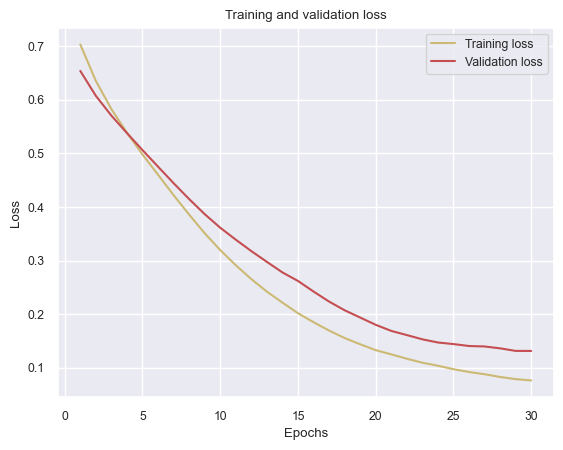

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [22]:

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.95      0.90      0.92        20
           2       0.88      1.00      0.94        15

    accuracy                           0.90        51
   macro avg       0.90      0.90      0.90        51
weighted avg       0.90      0.90      0.90        51

[[13  1  2]
 [ 2 18  0]
 [ 0  0 15]]
